# Math/Stats Application Workshop: Python

Sections:

1. Data Import
2. Data checks and cleaning
3. 1-Tail Hypothesis Test: Is everyone signing onto all 3 agreements?
4. 2-Tail Hypothesis Test: Are Canada's emissions average?
5. Proportion Comparison Test: Are high-income countries more likely to make emission reduction pledges?
6. 2-Tail Means Comparison: Do high-income countries make higher or lower emission reductions?
7. Group Comparisons: Are average emission levels different by continent?
8. Regression: Is there evidence of an Environmental Kuznets Curve?


Resources:

- [One-Sample t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
- [Proportion Comparison Test](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html)
- [Means Comparison Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
- [Group Comparison Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)
- [Statsmodels OLS](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html)

In [41]:
#!pip install statsmodels

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')

# 1. Data Import

In [43]:
# regional_emissions.csv Google Drive method

url = "https://drive.google.com/file/d/1uq7hHEgFmxUb1xhEK7tvpM_KZ2HhiNvS/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split('/')[-2]
policy_df = pd.read_csv(path)

policy_df.head()

,cntry,country,CountryCode,year,wbregion,Incomegroup,total_fossil_co2_percapita,total_fossil_co2_emissions,cum_policies,cum_laws,...,GHG_percapita,GHG_total,GHG_incLULUCF,GDP,GDP_growth,GDP_percapita,population,urban_pop,oil_rents,cpi_inflation
0,Afghanistan,Afghanistan,AFG,1970,South Asia,Low income,0.131777,1.466159,0,0,...,1.526567,16.984737,0.0,NaN,NaN,NaN,11.173642,11.643,0.017789,NaN
1,Afghanistan,Afghanistan,AFG,1971,South Asia,Low income,0.128334,1.465293,0,0,...,1.485187,16.957572,0.0,NaN,NaN,NaN,11.475445,12.021,0.029425,NaN
2,Afghanistan,Afghanistan,AFG,1972,South Asia,Low income,0.128894,1.510878,0,0,...,1.313449,15.396115,0.0,NaN,NaN,NaN,11.791215,12.410,0.033101,NaN
3,Afghanistan,Afghanistan,AFG,1973,South Asia,Low income,0.122525,1.473702,0,0,...,1.269763,15.272453,0.0,NaN,NaN,NaN,12.108963,12.809,0.055438,NaN
4,Afghanistan,Afghanistan,AFG,1974,South Asia,Low income,0.153876,1.895983,0,0,...,1.391304,17.142954,0.0,NaN,NaN,NaN,12.412950,13.219,0.182464,NaN


# 2. Data Checks and Cleaning Approach

We want to check through our dataset before we start analyzing it, or else we're going to waste a lot of time later diverting back and fixing it. 

What do we need to look at?

1. Checking column data types. Are numerics in float/int format?
2. Checking for missing values. Which columns and rows have them? How do we handle this? 

### 1. Column Data Type Checks

In [44]:
policy_df[['cntry', 'country', 'CountryCode', 'year', 'wbregion', 'Incomegroup',
       'total_fossil_co2_percapita', 'total_fossil_co2_emissions',
       'cum_policies', 'cum_laws', 'cum_adaptation_policies',
       'cum_demand_policies', 'cum_supply_policies',
       'cum_institution_policies', 'cum_transport_policies',
       'cum_lulucf_policies', 'cum_randd_policies', 'cum_CP_policies',
       'cum_ETS', 'cum_CT', 'cum_ETS_sn', 'cum_CT_sn', 'upperbound1',
       'GHG_total_start1', 'rel_reduction_high1']].dtypes

cntry                          object
country                        object
CountryCode                    object
year                            int64
wbregion                       object
Incomegroup                    object
total_fossil_co2_percapita    float64
total_fossil_co2_emissions    float64
cum_policies                    int64
cum_laws                        int64
cum_adaptation_policies         int64
cum_demand_policies             int64
cum_supply_policies             int64
cum_institution_policies        int64
cum_transport_policies          int64
cum_lulucf_policies             int64
cum_randd_policies              int64
cum_CP_policies                 int64
cum_ETS                         int64
cum_CT                          int64
cum_ETS_sn                      int64
cum_CT_sn                       int64
upperbound1                   float64
GHG_total_start1              float64
rel_reduction_high1           float64
dtype: object

In [45]:
policy_df[['rel_reduction_low1',
       'partytopledge1', 'upperbound2', 'GHG_total_start2',
       'rel_reduction_high2', 'rel_reduction_low2', 'partytopledge2',
       'upperbound3', 'GHG_total_start3', 'rel_reduction_high3',
       'rel_reduction_low3', 'partytopledge3', 'GHG_percapita', 'GHG_total',
       'GHG_incLULUCF', 'GDP', 'GDP_growth', 'GDP_percapita', 'population',
       'urban_pop', 'oil_rents', 'cpi_inflation']].dtypes

rel_reduction_low1     float64
partytopledge1         float64
upperbound2            float64
GHG_total_start2       float64
rel_reduction_high2    float64
rel_reduction_low2     float64
partytopledge2         float64
upperbound3            float64
GHG_total_start3       float64
rel_reduction_high3    float64
rel_reduction_low3     float64
partytopledge3         float64
GHG_percapita          float64
GHG_total              float64
GHG_incLULUCF          float64
GDP                    float64
GDP_growth             float64
GDP_percapita          float64
population             float64
urban_pop              float64
oil_rents              float64
cpi_inflation          float64
dtype: object

So, looks like the data came through well. The majority are `float64` and `int64`, with a few `object` variables for categories. 

### 2. Mising Value Checks

In [46]:
policy_df.isna()

,cntry,country,CountryCode,year,wbregion,Incomegroup,total_fossil_co2_percapita,total_fossil_co2_emissions,cum_policies,cum_laws,...,GHG_percapita,GHG_total,GHG_incLULUCF,GDP,GDP_growth,GDP_percapita,population,urban_pop,oil_rents,cpi_inflation
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10383,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10384,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
10385,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
10386,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False


This is useful. Sort of.

If we wanted to go through a 10,388 row dataset and see where the missing values are, we could've eyeballed it in Excel. When we combine `.isna()` with `.sum()`, however, we add up all the `NaN` values in each column. This tells us which columns might be problematic!

In [47]:
# first sum up `NaN` values by column
missing_values  = policy_df.isna().sum()

# problem - too many columns to print out all. We'll limit the output to just columns with missing values
columns_with_missing = missing_values[missing_values > 0]

# return these
columns_with_missing

wbregion                       196
Incomegroup                    686
total_fossil_co2_percapita      98
upperbound1                   7595
GHG_total_start1              1568
rel_reduction_high1           1519
rel_reduction_low1            1519
partytopledge1                1372
upperbound2                   8624
GHG_total_start2              1568
rel_reduction_high2           1617
rel_reduction_low2            1617
partytopledge2                1372
upperbound3                   3479
GHG_total_start3              1568
rel_reduction_high3           2891
rel_reduction_low3            2891
partytopledge3                1372
GHG_percapita                  728
GHG_total                      636
GHG_incLULUCF                 2108
GDP                           2394
GDP_growth                    2352
GDP_percapita                 2397
population                     765
urban_pop                      762
oil_rents                     2950
cpi_inflation                 3610
dtype: int64

Our takeaway is that we've got plenty of missing values, in plenty of columns!

### Data Cleaning Plan

We could come up with a general criteria for which rows stay and which we get rid of, to keep a common and standard dataframe. This may involve removing all countries with missing data (a strict approach), or just removing years with missing data, or a combined approach.

However, our focus today is on Hypothesis Testing, with a side of Data Cleaning. So, our process will be to keep all data in the base `policy_df` DataFrame. When we're working on each specific exercise, we'll limit it just to the columns we need to use, and then remove all rows with missing data. This lets us test Hypotheses with the maximum range of available data, and try out data cleaning along the way.

# 3. 1-Tail Hypothesis Test: Are all countries signing onto all 3 agreements?

We'll use this question to see whether there is a high degree of consensus among the agreements being desireable. With a one-sided test, we'll see if most countries sign up onto all 3, or if there is significant non-acceptance.

Using each country's latest year in the data, we'll sum the pledges they've made and compare with 3. In this case, a one-sided hypothesis test makes sense, as there are only these three agreements!

### Our Hypotheses

- H0: Effectively all countries sign up to all 3 agreements (Kyoto, Copenhagen, Paris)
- H1: Not all countries sign up to all 3 agreements


In [48]:
# dataframe creation

hypothesis_1_df = policy_df[["country", "year", "partytopledge1", "partytopledge2", "partytopledge3"]]
hypothesis_1_df.head()

,country,year,partytopledge1,partytopledge2,partytopledge3
0,Afghanistan,1970,1.0,0.0,1.0
1,Afghanistan,1971,1.0,0.0,1.0
2,Afghanistan,1972,1.0,0.0,1.0
3,Afghanistan,1973,1.0,0.0,1.0
4,Afghanistan,1974,1.0,0.0,1.0


In [49]:
# NaN check

print(hypothesis_1_df.isna().sum())

# NaN removal

hypothesis_1_df = hypothesis_1_df.dropna()
hypothesis_1_df

country              0
year                 0
partytopledge1    1372
partytopledge2    1372
partytopledge3    1372
dtype: int64


,country,year,partytopledge1,partytopledge2,partytopledge3
0,Afghanistan,1970,1.0,0.0,1.0
1,Afghanistan,1971,1.0,0.0,1.0
2,Afghanistan,1972,1.0,0.0,1.0
3,Afghanistan,1973,1.0,0.0,1.0
4,Afghanistan,1974,1.0,0.0,1.0
...,...,...,...,...,...
10383,Zimbabwe,2014,0.0,0.0,1.0
10384,Zimbabwe,2015,0.0,0.0,1.0
10385,Zimbabwe,2016,0.0,0.0,1.0
10386,Zimbabwe,2017,0.0,0.0,1.0


There were three different rounds of environmental pledges involved in this dataset:

1. The Kyoto Protocol (signed 1997)
2. The Copenhagen Accord (signed 2009)
3. The Paris Agreement (signed 2016)

We'll combine all three variables in `total_pledges`, equal to the number of active agreements the country has signed onto.

In [50]:
hypothesis_1_df["total_pledges"] = hypothesis_1_df["partytopledge1"] + hypothesis_1_df['partytopledge2'] + hypothesis_1_df['partytopledge3']

hypothesis_1_df

,country,year,partytopledge1,partytopledge2,partytopledge3,total_pledges
0,Afghanistan,1970,1.0,0.0,1.0,2.0
1,Afghanistan,1971,1.0,0.0,1.0,2.0
2,Afghanistan,1972,1.0,0.0,1.0,2.0
3,Afghanistan,1973,1.0,0.0,1.0,2.0
4,Afghanistan,1974,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...
10383,Zimbabwe,2014,0.0,0.0,1.0,1.0
10384,Zimbabwe,2015,0.0,0.0,1.0,1.0
10385,Zimbabwe,2016,0.0,0.0,1.0,1.0
10386,Zimbabwe,2017,0.0,0.0,1.0,1.0


In [51]:
# this groups by Country, and takes the first value found for each country

# all of a country's `total_pledges` values will be the same, so we only need one as representative 

hypothesis_1_sample_df = hypothesis_1_df[["country", "total_pledges"]].groupby("country").first()

In [52]:
hypothesis_1_sample_df["total_pledges"]

country
Afghanistan            2.0
Albania                1.0
Algeria                2.0
Angola                 1.0
Antigua and Barbuda    2.0
                      ... 
Vietnam                1.0
Western Sahara         0.0
Yemen, Rep.            1.0
Zambia                 1.0
Zimbabwe               1.0
Name: total_pledges, Length: 184, dtype: float64

What this gets us is, for each country, how many total agreements they signed onto. 

You might guess it's not looking good for our null hypothesis...

# Q1 Hypothesis Testing 

The `stats.ttest_1samp()` function is a T-test for the mean of one group of values. It takes the following arguments:

arguments:

- `a`: a list, array, dataframe column, etc, of numeric values

- `popmean`: the null hypothesis value. Often but not always 0, and it must be specified

- `alternative`: {"two-sided", "less", "greater"} specifies the alternate hypothesis, defaulting to "two-sided``


It outputs a test statistic (i.e. t-value here) and an associated p-value.

In [53]:
test_statistic, p_value = stats.ttest_1samp(hypothesis_1_sample_df["total_pledges"], popmean = 3, alternative = "less")

print("Test Statistic: ", test_statistic)
print("P-value: ", p_value)

Test Statistic:  -21.591061460842845
P-value:  1.6723124752314074e-52


### Q1: Interpretation

Discuss what the test-statistic and P-value tell us with the person next to you, or the people at your table. Then, we'll talk as a class.



# 4. 2-Tail Hypothesis Test: Are Canada's emissions average?


Now we'll be doing a two-sided hypothesis test, where we compare a series of data points to a given value and test if the sample has a statistically significant difference. This time, it can be greater or less than the given value.

For our question, we are going to take Canada's average per capita carbon emissions and compare them to all other countries. Are other countries significantly greater or lower than us?

### Our Hypotheses

- H0: Most countries' average per-capita carbon emissions are equal to Canadian values
- H1: Most countries' average per-capita carbon emissions are not equal to Canadian values 

In [54]:
# creating hypothesis 2 dataframe
hypothesis_2_df = policy_df[["country", "GHG_percapita"]]

# grouping by country to get average emissions
hypothesis_2_df = hypothesis_2_df.dropna().groupby("country").mean()

hypothesis_2_df.reset_index(inplace = True)

# splitting into Canada, not Canada versions
hypothesis_2_canada = hypothesis_2_df[hypothesis_2_df["country"] == "Canada"]

hypothesis_2_df = hypothesis_2_df[hypothesis_2_df["country"] != "Canada"]

In [55]:
hypothesis_2_canada["GHG_percapita"]

34    22.917172
Name: GHG_percapita, dtype: float64

In [56]:
hypothesis_2_df["GHG_percapita"]

0      1.035752
1      3.031959
2      6.833055
3      4.963808
4      1.287038
         ...   
205    3.137882
206    6.340505
207    1.397705
208    1.980941
209    2.810555
Name: GHG_percapita, Length: 209, dtype: float64

### Q2 Hypothesis Testing

We repeat `stats.ttest_1samp()`, this time leaving the alternate value argument defaulted to "two-sided"

In [57]:
test_statistic, p_value = stats.ttest_1samp(hypothesis_2_df["GHG_percapita"], popmean = hypothesis_2_canada["GHG_percapita"])

print("Test Statistic: ", test_statistic)
print("P-value: ", p_value)

Test Statistic:  -10.053823258082348
P-value:  1.2366280565482495e-19


### Q2: Interpretation

Discuss what the test-statistic and P-value tell us with the person next to you, or the people at your table. Then, we'll talk as a class.

# 5. Proportion Comparison Test: Are high-income countries more likely to make emission reduction pledges?

The environmental Kuznets Curve suggests we might see an inverted-U relationship of carbon emissions with national wealth. 

- at low wealth levels, countries don't produce enough to cause high carbon emissions

- at medium wealth levels, countries are focused on production over environmental concerns, leading to high per-capita emissions

- at high wealth levels, environmental concerns become emphasized and countries spend to reduce their emissions


We will investigate this effect by seeing whether High Income countries have signed onto greater proportions of the climate agreements than other countries.

### Our Hypotheses

- H0: There is no difference in proportion signing the Agreement.
- H1: The proportion of High Income countries signing is different from non-High Income countries

### Steps:

1. Get each country's proportion of agreements signed onto (out of 3)
2. Subset out the High Income countries
3. Compute average for High Income, and not-High Income countries
4. Compare using statistical test

In [58]:
# create hypothesis 3 dataframe
hypothesis_3_df = policy_df[["country", "Incomegroup", "partytopledge3"]]

hypothesis_3_df

,country,Incomegroup,partytopledge3
0,Afghanistan,Low income,1.0
1,Afghanistan,Low income,1.0
2,Afghanistan,Low income,1.0
3,Afghanistan,Low income,1.0
4,Afghanistan,Low income,1.0
...,...,...,...
10383,Zimbabwe,Lower middle income,1.0
10384,Zimbabwe,Lower middle income,1.0
10385,Zimbabwe,Lower middle income,1.0
10386,Zimbabwe,Lower middle income,1.0


In [59]:
# making high income dataframe
hypothesis_3_hi = hypothesis_3_df[hypothesis_3_df["Incomegroup"] == "High income"]

# grouping by country and taking first value
hypothesis_3_hi_group = hypothesis_3_hi.groupby("country").first()

# removing NaNs
hypothesis_3_hi_group = hypothesis_3_hi_group.dropna()

# returning dataframe
hypothesis_3_hi_group.head()

,Incomegroup,partytopledge3
country,,
Antigua and Barbuda,High income,1.0
Australia,High income,1.0
Austria,High income,1.0
"Bahamas, The",High income,1.0
Bahrain,High income,1.0


In [60]:
# making NOT high income dataframe
hypothesis_3_not_hi = hypothesis_3_df[hypothesis_3_df["Incomegroup"] != "High income"]

# grouping by country and taking first value
hypothesis_3_not_hi_group = hypothesis_3_not_hi.groupby("country").first()

# removing NaNs
hypothesis_3_not_hi_group = hypothesis_3_not_hi_group.dropna()

# returning dataframe
hypothesis_3_not_hi_group

,Incomegroup,partytopledge3
country,,
Afghanistan,Low income,1.0
Albania,Upper middle income,1.0
Algeria,Upper middle income,1.0
Angola,Lower middle income,1.0
Argentina,Upper middle income,1.0
...,...,...
"Venezuela, RB",Upper middle income,1.0
Vietnam,Lower middle income,1.0
"Yemen, Rep.",Low income,1.0


### Q3 Hypothesis Testing

This time, we're comparing two proportions.

`statsmodels.stats.proportions_ztest()` is our hypothesis testing function. Its arguments are:

- `count`: a list of the different groups' numbers of successes. 
- `nobs`: a list of the different groups' numbers of total observations
- `alternative`: one of {"two-sided", "smaller", "larger"} for two-sided or one-sided test

`count` and `nobs` must be inputted in the same order, so if we have:

- group 1, with 10 successes and 20 observations
- group 2, with 15 successes and 18 observations

We would input these as [10, 15] and [20, 18].

In [61]:
print("Proportion of High Income countries signing Paris Agreement: " + str(hypothesis_3_hi_group["partytopledge3"].mean()))
print("Number of high income countries: " + str(len(hypothesis_3_hi_group)))

Proportion of High Income countries signing Paris Agreement: 0.9636363636363636
Number of high income countries: 55


In [62]:
print("Proportion of non-High Income countries signing Paris Agreement: " + str(hypothesis_3_not_hi_group["partytopledge3"].mean()))
print("Number of non-high income countries: " + str(len(hypothesis_3_not_hi_group)))

Proportion of non-High Income countries signing Paris Agreement: 0.9603174603174603
Number of non-high income countries: 126


These are notably similar, so we likely shouldn't have high expectations for disproving the null hypothesis.

In [63]:
p_hi = hypothesis_3_hi_group["partytopledge3"].mean()
n_hi = len(hypothesis_3_hi_group)

p_not_hi = hypothesis_3_not_hi_group["partytopledge3"].mean()
n_not_hi = len(hypothesis_3_not_hi_group)


z_score, p_value = sm.stats.proportions_ztest(count = [p_hi*n_hi, p_not_hi*n_not_hi], nobs = [n_hi, n_not_hi], alternative = "two-sided")

print("Z-score: ", z_score)
print("P-value: ", p_value)

Z-score:  0.10650668363508603
P-value:  0.9151803527995432


### Q3: Interpretation

Discuss what the test-statistic and P-value tell us with the person next to you, or the people at your table. Then, we'll talk as a class.


# 6. 2-Tail Means Comparison: Do high-income countries make higher or lower absolute emission reductions?

So if High Income countries are more likely to sign onto climate agreements than Mid/Low-Income countries, how do they behave after signing?

We're going to analyze this question by taking the mean emission reduction done by High Income countries and compare it with that of other countries. Since we don't have a strong reason to assume it will be one or the other, we will use a two-tailed test. 

Our reductions will come from the `rel_reduction____` variables. The "rel" part marks these as "relative" emissions. This actually means two things!

1. The reductions are *relative* to their levels at the start of the agreement coming into force. 1 is Kyoto, 2 is Copenhagen, 3 is Paris. 

2. The reductions are proportional: pledging `23.4` emissions reductions means to promise to decrease by 23.4%.

### Many ways to skin a cat

When we ask, "Do high-income countries make higher or lower absolute emission reductions?", what exactly do we mean?

There are *many* ways to turn that question into a series of commands in Python. Each of the 3 climate agreements has 2 reduction pledges; a high and a low value. This gives us 6 variables we can come up with a test on:

- we might average all of them
- we might average the high, or low, ones
- we might take just the most recent Paris Agreeement value

Any of these *could* be reasonable. We could even transform the data into proportional or absolute values. Now, what if we had an agenda to push?

- we might want to say rich countries aren't pulling their share in emissions reductions!
- we might want to say they **are** pulling their weight and everyone else should stop complaining!

If you're somehow committed to a specific result, you may be tempted to run a number of these, and report the result most favorable to your views. Or, run just the one you think will give the most convenient result and not explore any others.

"Researcher degrees of freedom" refers to this flexibility in how statistical analyses are designed and reported, and plays a major role in the Replication Crisis affecting much of academic social science. Economics is less badly affected than the worst offenders (psychology, sociology), but it's still a serious concern. 

### Our specification and why

We will be taking the most recent pledge round, the Paris Agreement, and using the low versions. Why?

1. This uses pledges currently in place. We will suggest that climate change is being taken more seriously as of late, due to the rise in heat waves and changing weather patterns resulting from it.

2. We will use the `low` value to be cynical about countries' pledges. If rich countries really are shirking, we'd see it in their lower-bound pledges.

### Our Hypotheses

- H0: High and non-High Income countries are not making different reduction pledges in the Paris Agreement.
- H1: High countries are making significantly greater or smaller reduction pledges in the Paris Agreement.

In [64]:
hypothesis_4_df = policy_df[["country", "Incomegroup", "rel_reduction_low3"]]
hypothesis_4_df

,country,Incomegroup,rel_reduction_low3
0,Afghanistan,Low income,-27.857044
1,Afghanistan,Low income,-27.857044
2,Afghanistan,Low income,-27.857044
3,Afghanistan,Low income,-27.857044
4,Afghanistan,Low income,-27.857044
...,...,...,...
10383,Zimbabwe,Lower middle income,NaN
10384,Zimbabwe,Lower middle income,NaN
10385,Zimbabwe,Lower middle income,NaN
10386,Zimbabwe,Lower middle income,NaN


In [65]:
# Drop NaN rows (avoid SettingWithCopyWarning)
hypothesis_4_df = hypothesis_4_df.dropna()

# Take the first value for each country
hypothesis_4_df = hypothesis_4_df.groupby("country").first()

# Split into high-income and not high-income
hypothesis_4_hi_df = hypothesis_4_df[hypothesis_4_df["Incomegroup"] == "High income"].copy()
hypothesis_4_not_hi_df = hypothesis_4_df[hypothesis_4_df["Incomegroup"] != "High income"].copy()

I think there's something off here.

Text(0.5, 1.0, 'What the Hell, Latvia?')

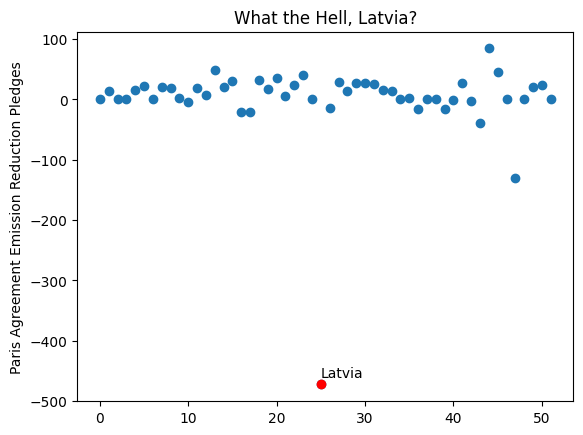

In [66]:
# make latvia df

latvia_df = hypothesis_4_hi_df[hypothesis_4_hi_df.index == "Latvia"]

# make x range, get y values
x = range(52)
y = hypothesis_4_hi_df["rel_reduction_low3"]

# make scatter plot
plt.scatter(x, y)

# add Latvia scatter at point 25
plt.scatter(x = 25, y = -472, color = "red", label = "Latvia")

# add Latvia label
plt.text(x[25], -460, "Latvia")

    
# axis labels
plt.ylabel("Paris Agreement Emission Reduction Pledges")

# plot title
plt.title("What the Hell, Latvia?")

In [67]:
import plotly.graph_objects as go

# x range and y values
x = list(range(52))
y = hypothesis_4_hi_df["rel_reduction_low3"]

# Latvia's index (assuming "Latvia" is at position 25)
latvia_x = 25
latvia_y = -472

fig = go.Figure()

# Main scatter plot
fig.add_trace(go.Scatter(
    x=x, y=y,
    mode='markers',
    name='Countries',
    marker=dict(color='blue')
))

# Latvia point
fig.add_trace(go.Scatter(
    x=[latvia_x],
    y=[latvia_y],
    mode='markers+text',
    name='Latvia',
    marker=dict(color='red', size=12),
    text=["Latvia"],
    textposition="bottom center"
))

# Update layout for labels and title
fig.update_layout(
    yaxis_title="Paris Agreement Emission Reduction Pledges",
    title="What the Hell, Latvia?",
    showlegend=True
)

fig.show()


Latvia has a bizarre outlier value at -472. A dishonorable mention goes to Trinidad and Tobago, at -130.

Does the non-High Income dataset have any outliers?

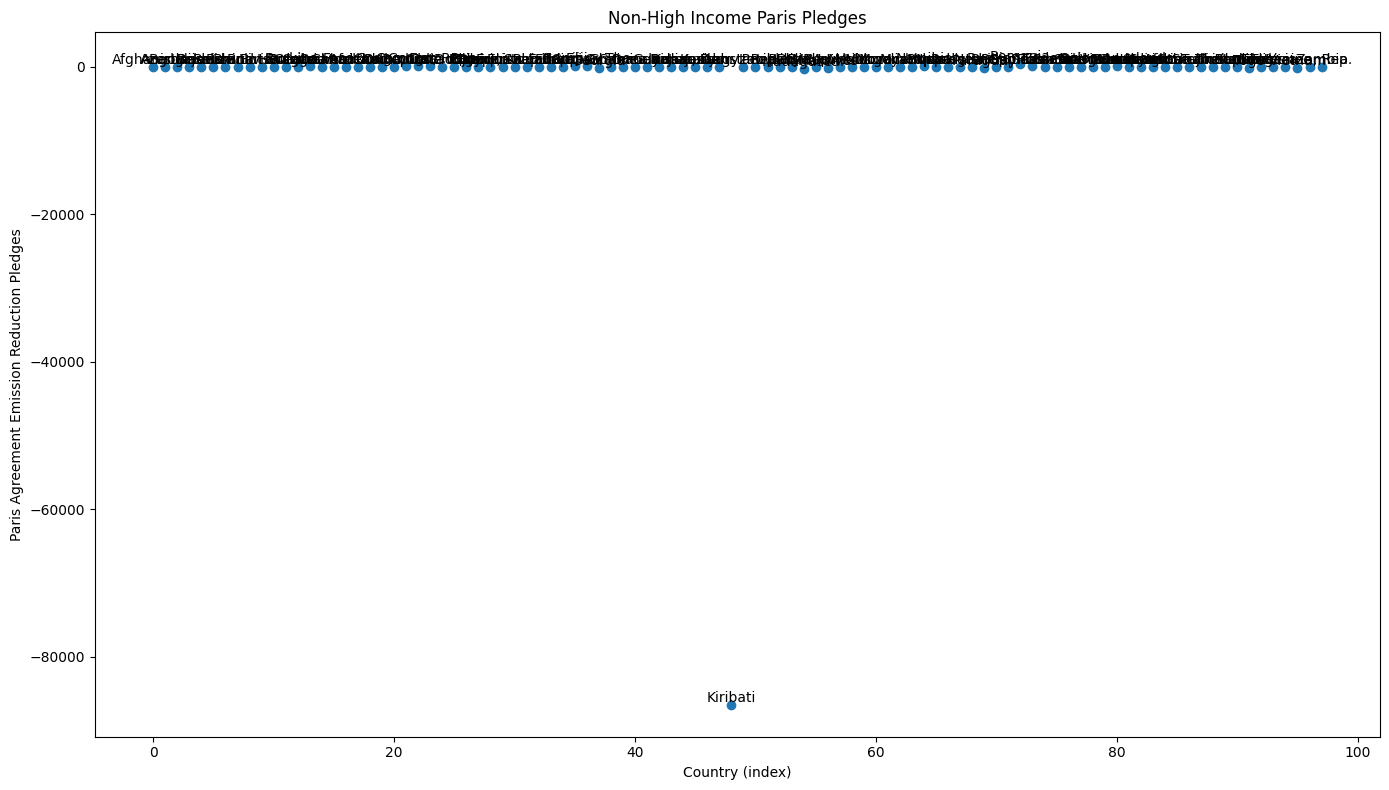

In [68]:
import matplotlib.pyplot as plt

# Make x range, get y values, and country labels as lists
x = list(range(len(hypothesis_4_not_hi_df)))
y = hypothesis_4_not_hi_df["rel_reduction_low3"].to_list()
labels = hypothesis_4_not_hi_df.index.to_list()

plt.figure(figsize=(14, 8))
plt.scatter(x, y)

# data labels
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=10, ha="center", va="bottom")

# axis labels
plt.ylabel("Paris Agreement Emission Reduction Pledges")
plt.xlabel("Country (index)")
plt.title("Non-High Income Paris Pledges")

plt.tight_layout()
plt.show()


Kiribati?! You too?

This is a *bizarre* outlier. In the source paper, the authors mention removing Latvia, Kiribati, and Madagascar from the sample in plots. We will run two hypothesis tests. One with the three outliers, and one without. 


### Two-tailed comparison of means

Our function here is Scipy's `stats.ttest_ind()`, which compares if two samples have identical averages. The relevant input arguments are:

- `a`, `b`: array, list, dataframe column, etc, sets of values 
- `equal_var`: True or False. If True, assumes the two sets of values have the same population variance. If False, it performs Welch's t-test, which does not rely on such assumption.

**CONFUSINGLY**, `equal_var` is set to True by default, which suggests the makers of `Scipy` hate us and want to make our results bad. This is a strong assumption, which the equivalent R function *doesn't* make by default, and we will not make it. 

In [69]:
hypothesis_4_hi_df["rel_reduction_low3"].mean()
hypothesis_4_hi_df["rel_reduction_low3"].var()

hypothesis_4_not_hi_df["rel_reduction_low3"].mean()
hypothesis_4_not_hi_df["rel_reduction_low3"].var()

np.float64(76373436.29754238)

In [70]:
# including all outliers

# two-sample t-test
t_statistic, p_value = stats.ttest_ind(a = hypothesis_4_hi_df["rel_reduction_low3"], b = hypothesis_4_not_hi_df["rel_reduction_low3"], equal_var = False)

# output results
print("T-statistic: ", t_statistic)
print("P-value: ", p_value)

T-statistic:  1.0045836960314467
P-value:  0.31759616568174026


We saw that Latvia and Kiribati are extreme outliers. The paper mentioned Madagascar as well. What if we remove them?

In [71]:
# make high income df without latvia
hypothesis_4_hi_no_latvia_df = hypothesis_4_hi_df.reset_index()
hypothesis_4_hi_no_latvia_df = hypothesis_4_hi_no_latvia_df[hypothesis_4_hi_no_latvia_df["country"] != "Latvia"]

# make not high income df without Kiribati, Madagascar
hypothesis_4_not_hi_no_kiri_mad_df = hypothesis_4_not_hi_df.reset_index()
hypothesis_4_not_hi_no_kiri_mad_df = hypothesis_4_not_hi_no_kiri_mad_df[hypothesis_4_not_hi_no_kiri_mad_df["country"] != "Kiribati"]
hypothesis_4_not_hi_no_kiri_mad_df = hypothesis_4_not_hi_no_kiri_mad_df[hypothesis_4_not_hi_no_kiri_mad_df["country"] != "Madagascar"]

# two-sample t-test
t_statistic, p_value = stats.ttest_ind(hypothesis_4_hi_no_latvia_df["rel_reduction_low3"], 
                                       hypothesis_4_not_hi_no_kiri_mad_df["rel_reduction_low3"],
                                       equal_var = False)

# output results
print("T-statistic: ", t_statistic)
print("P-value: ", p_value)

T-statistic:  1.4313324729377335
P-value:  0.15450667855769346


### Q4: Interpretation

Discuss our two results here. What do they suggest about the hypothesis?


In [72]:
# Extract the data series
#data_series1 = hypothesis_4_hi_no_latvia_df["rel_reduction_low3"]

#data_series2 = hypothesis_4_not_hi_no_kiri_mad_df["rel_reduction_low3"]

# Create a scatter plot
#plt.scatter(y = data_series1, x = range(51), color='blue', label='High Income')
#plt.scatter(y = data_series2, x = range(96), color='red', label='Not High Income')

# Add labels and legend
#plt.ylabel("Paris Agreement Reduction Pledges")
#plt.legend()

# Add a title
#plt.title("Scatter Plot of rel_reduction_low3, Outliers Removed")

# Show the plot
#plt.show()

We can get an intuitive feeling for this result with the above scatter plot. Ignore the horizontal variance - it's just to separate out the plot points. 






# 7. Group Comparisons: Are average emission levels different by region?

So, if High Income countries aren't making bigger or smaller reductions than others, what does overall emission variability look like?

We'll look at actual emissions, on a per-capita basis, this time. Groups will be made by overall world region. Because these vary over time, we can't just take any entry in a country's data. Instead, we'll remove all NaN values and then take the most recent value. 

### Hypotheses

- H0: Mean per-capita emissions are equal across world regions
- H1: Mean per-capita emissions are not equal across world regions

### Steps

We'll get a dataframe with the `country`, `year`, `wbregion` and `GHG_percapita` variables, remove NaN values and grab the most recent year. Then, we'll compare the average `GHG_percapita` values by region.

In [73]:
# assign hypothesis 5 dataframe
hypothesis_5_df = policy_df[["country", "year", "wbregion", "GHG_percapita"]]

# drop NaN values
hypothesis_5_df.dropna(inplace=True)

# find most recent year by country
most_recent_indices = hypothesis_5_df.groupby('country')['year'].idxmax()

# Subset the DataFrame to include only the most recent year for each country
hypothesis_5_df = hypothesis_5_df.loc[most_recent_indices]

hypothesis_5_df

,country,year,wbregion,GHG_percapita
45,Afghanistan,2015,South Asia,0.923207
94,Albania,2015,Europe & Central Asia,3.033559
143,Algeria,2015,Middle East & North Africa,6.004847
192,Angola,2015,Sub-Saharan Africa,2.908655
241,Anguilla,2015,Latin America & Caribbean,2.207837
...,...,...,...,...
10139,Vietnam,2015,East Asia & Pacific,3.586052
10188,Western Sahara,2015,Sub-Saharan Africa,1.579486
10286,"Yemen, Rep.",2015,Middle East & North Africa,1.203430
10335,Zambia,2015,Sub-Saharan Africa,1.465929


In [74]:
# what are the regions?
hypothesis_5_df["wbregion"].unique()

array(['South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'Sub-Saharan Africa',
       'Latin America & Caribbean', 'East Asia & Pacific',
       'North America'], dtype=object)

### Testing Hypothesis

Scipy's `stats.f_oneway()` performs a one-way ANOVA test: the null hypothesis holds that two or more groups have the same population mean. The different groups inpuuted can have differing sizes.

Arguments include:

- `sample1`, `sample2`, etc: array/list/columns of numeric values

These don't need to be named as `sample#`, and we won't bother below. 

The function returns an F-statistic and a p-value.

In [75]:
# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(hypothesis_5_df[hypothesis_5_df["wbregion"] == "South Asia"]["GHG_percapita"],
                                      hypothesis_5_df[hypothesis_5_df["wbregion"] == "Europe & Central Asia"]["GHG_percapita"],
                                      hypothesis_5_df[hypothesis_5_df["wbregion"] == "Middle East & North Africa"]["GHG_percapita"],
                                      hypothesis_5_df[hypothesis_5_df["wbregion"] == "Sub-Saharan Africa"]["GHG_percapita"],
                                      hypothesis_5_df[hypothesis_5_df["wbregion"] == "Latin America & Caribbean"]["GHG_percapita"],
                                      hypothesis_5_df[hypothesis_5_df["wbregion"] == "East Asia & Pacific"]["GHG_percapita"],
                                      hypothesis_5_df[hypothesis_5_df["wbregion"] == "North America"]["GHG_percapita"])

# Output the results
print("F-statistic: ", f_statistic)
print("P-value: ", p_value)

F-statistic:  4.546858263925497
P-value:  0.00023917782457569077


### Q5: Interpretation

You know the drill.

# 8. Regression: Is there evidence for an Environmental Kuznets Curve?

Much of our analysis has related to the relationship of emissions, or emission pledges, to national wealth. The following model will finish off our investigation.

The "Environmental Kuznets Curve" relates environmental quality with economic growth. It suggests that as a country becomes wealthier, it will first see degraded environmental quality, likely as a result of growing energy and land use in manufacturing industries. However, beyond a certain point, further increases to per-capita income will cause the environment to improve again. From here on, marginal willingness to pay for environmental quality exceeds the marginal damage caused by economic growth (or said economic growth becomes more energy efficient, or the services sector comes to dominate manufacturing). 

We will model this by regressing per-capita greenhouse gas emissions against GDP/capita, and (GDP/capita)^2. The first GDP/Capita term provides the initial environmental degradation as industry grows. The quadratic term, if theory holds, will be negative and eventually dominate the linear term.

### Hypotheses
H0: There is no evidence of per-capita emissions falling with increasing wealth levels
H1: A negative coefficient on the (GDP/capita)^2 term provides evidence of falling per-capita emissions with high wealth level

In [76]:
# initialize regression dataframe
regression_df = policy_df[["country", "year", "GHG_percapita", "GDP_percapita"]]

# drop missing values
regression_df.dropna(inplace=True)

# calculate GDP_percapita_square
regression_df["GDP_percapita_square"] = regression_df["GDP_percapita"]**2

regression_df.head()

,country,year,GHG_percapita,GDP_percapita,GDP_percapita_square
32,Afghanistan,2002,0.702079,330.303553,109100.437064
33,Afghanistan,2003,0.683639,343.080890,117704.496887
34,Afghanistan,2004,0.663115,333.216684,111033.358820
35,Afghanistan,2005,0.650085,357.234720,127616.645108
36,Afghanistan,2006,0.641430,365.284495,133432.762252


First, it's never a bad idea to visualize our data. As we saw a few hypotheses back, it helps you catch outliers, and see any abnormal patterns in your data.

<Axes: title={'center': 'Scatter Plot of GDP per Capita vs. GHG per Capita'}, xlabel='GDP_percapita', ylabel='GHG_percapita'>

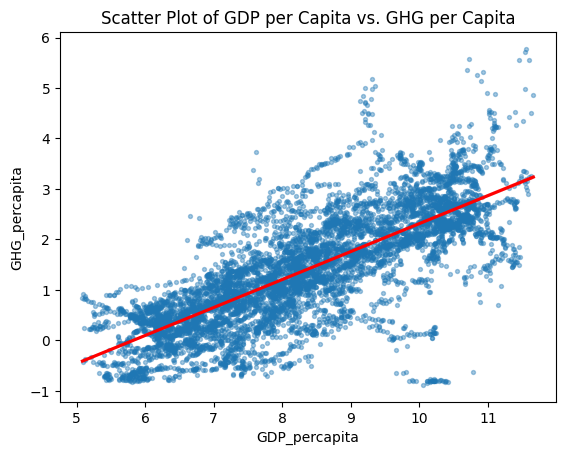

In [77]:
# visualize log GHG per capita versus log GDP per capita

# create logged variables

log_gdppc = np.log(regression_df["GDP_percapita"])
log_ghgpc = np.log(regression_df["GHG_percapita"])

#plt.plot(x = regression_df["GDP_percapita"], y = regression_df["GHG_percapita"])

plt.scatter(x = log_gdppc, y = log_ghgpc, alpha=0.4, s = 8)
plt.xlabel("GDP per Capita")
plt.ylabel("GHG per Capita")
plt.title("Scatter Plot of GDP per Capita vs. GHG per Capita")

# add regression line
sns.regplot(x = log_gdppc, y = log_ghgpc, scatter=False, color='red')

Working with logarithm values, the relationship is... iffy. However, the logarithms make this already a nonlinear relationship, compressing in the very high values. What if we use raw data? 

<Axes: title={'center': 'Scatter Plot of GDP per Capita vs. GHG per Capita'}, xlabel='GDP_percapita', ylabel='GHG_percapita'>

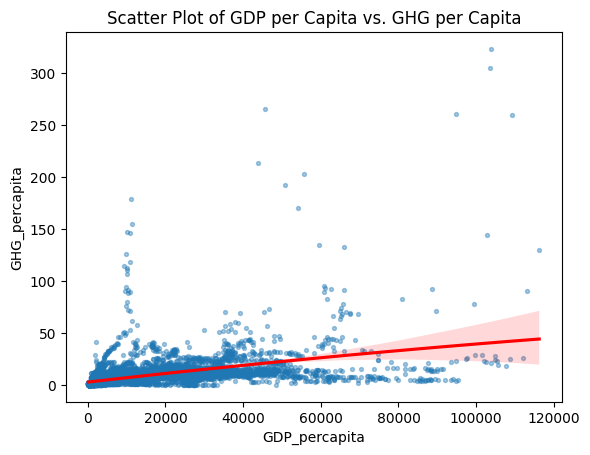

In [78]:
# visualize GHG per capita versus GDP per capita

# create variables

gdppc = regression_df["GDP_percapita"]
ghgpc = regression_df["GHG_percapita"]

#plt.plot(x = regression_df["GDP_percapita"], y = regression_df["GHG_percapita"])

plt.scatter(x = gdppc, y = ghgpc, alpha=0.4, s = 8)
plt.xlabel("GDP per Capita")
plt.ylabel("GHG per Capita")
plt.title("Scatter Plot of GDP per Capita vs. GHG per Capita")

# add regression line
sns.regplot(x = gdppc, y = ghgpc, order = 2, scatter=False, color='red')

Using non-logged, raw values, is rough. The data is blown way, way up by the extreme outliers on `GHG_percapita`. 

*However*, the greenhouse gas emissions per capita flattens out remarkably past ~25, with even some of the richest countries being only marginally higher than the poorest. The outliers may be problematic for our regression, but we can give it a try, in `reg_1`, using non-logged values.

In [79]:
# add constant term
X = sm.add_constant(regression_df)

X

,const,country,year,GHG_percapita,GDP_percapita,GDP_percapita_square
32,1.0,Afghanistan,2002,0.702079,330.303553,1.091004e+05
33,1.0,Afghanistan,2003,0.683639,343.080890,1.177045e+05
34,1.0,Afghanistan,2004,0.663115,333.216684,1.110334e+05
35,1.0,Afghanistan,2005,0.650085,357.234720,1.276166e+05
36,1.0,Afghanistan,2006,0.641430,365.284495,1.334328e+05
...,...,...,...,...,...,...
10380,1.0,Zimbabwe,2011,2.101805,1066.426265,1.137265e+06
10381,1.0,Zimbabwe,2012,2.108019,1223.203432,1.496227e+06
10382,1.0,Zimbabwe,2013,2.086966,1225.558112,1.501993e+06
10383,1.0,Zimbabwe,2014,1.898352,1232.864865,1.519956e+06


### Running Regression

We use Statsmodels' regression function, `sm.OLS()`

- `endog`: an array/list/dataframe column of our outcome variable's samples
- `exog`: a dataframe containing our explanatory variables

`endog` and `exog` must be the same length: the easiest way to ensure this is to keep them all in one dataframe, and then just name them as done below.

This just sets up our regression. We must also run the model with the `.fit()` method.

- `cov_type` sets our standard errors, with several options. We use the heteroskedasticity-robust "HC3" type.

Finally, we call our regression with the `.summary()` method to output the results. 

In [80]:
# then test model

# create model
reg_1 = sm.OLS(X["GHG_percapita"], X[["const", "GDP_percapita", "GDP_percapita_square"]]).fit(cov_type = "HC3")

# print summary
print(reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:          GHG_percapita   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     427.9
Date:                Thu, 07 Aug 2025   Prob (F-statistic):          1.31e-176
Time:                        00:04:24   Log-Likelihood:                -29031.
No. Observations:                7436   AIC:                         5.807e+04
Df Residuals:                    7433   BIC:                         5.809e+04
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.9919 

### Q6: Interpretation

Discuss the regression results - focus on the `coef`, `std err`, `z` and `P>|z|` values.



